In [15]:
'''
    This notebook presents the results and plots derived from the application of Support Vector Machine Regression (SVMR) to the fitted parameters
    of ellipses.
'''

'\n    This notebook presents the results and plots derived from the application of Support Vector Machine Regression (SVMR) to the fitted parameters\n    of ellipses.\n'

In [16]:
import warnings
warnings.filterwarnings("ignore")

In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.svm import SVR
import matplotlib.pyplot as plt

In [18]:
df = pd.read_csv('../Data/avg_fitted_ellipse_parameter_and_true_volume.csv')  

In [19]:
columns = ['apple_label', 'semi_major_axis', 'semi_minor_axis', 'area', 'perimeter', 'eccentricity', 'volume']

column_dict = {
    0: 'semi_major_axis',
    1: 'semi_minor_axis',
    2: 'area',
    3: 'perimeter',
    4: 'eccentricity'
}


In [20]:
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [105]:
X = df.drop(columns = ['apple_label', 'area', 'volume']).values.tolist() 
y = df['volume'].values.tolist()  

rmses = []
mses = []
mpes = []

seeds = [0, 100, 200, 300, 400, 500]
for seed in seeds:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = seed)
    
    svr_model = SVR(kernel='linear')
    svr_model.fit(X_train, y_train)
    y_pred = svr_model.predict(X_test)
    
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mse = mean_squared_error(y_test, y_pred)
    mpe = mean_absolute_percentage_error(y_test, y_pred)
    
    mses.append(mse)
    rmses.append(rmse)
    mpes.append(mpe)

mse = sum(mses) / len(mses)
rmse = sum(rmses) / len(rmses)
mpe = sum(mpes) / len (mpes)

In [106]:
print("********* Testing error **********")
print("Root Mean Squared Error (RMSE):", round(rmse, 3))
print("Mean Squared Error (MSE):", round(mse, 3))
print("Mean Percentage Error (MPE):", round(mpe, 3))

********* Testing error **********
Root Mean Squared Error (RMSE): 16.631
Mean Squared Error (MSE): 279.198
Mean Percentage Error (MPE): 9.016


In [107]:
y_pred = np.concatenate((svr_model.predict(X_train) , svr_model.predict(X_test)))
y_true = y_train.copy()
y_true.extend(y_test)  
y_true = np.array(y_true)

In [108]:
def get_absolute_error(y_true, y_pred):
    return np.abs(y_pred - y_true)

In [109]:
def plot_true_volume_vs_predicted_volume(y_true, y_pred):
    plt.figure(figsize=(20, 7.5))
    plt.plot(df.index, y_true, color='green', label='True Volume')
    plt.plot(df.index, y_pred, color='blue', label='Predicted Volume')
    plt.xlabel('Apple label')
    plt.ylabel('Volume')
    plt.title('Plot of Volume vs Apple Label')
    plt.xlim(0, 200) 
    plt.ylim(0, 400)
    plt.legend()
    plt.grid(True)
    plt.show()

In [110]:
def plot_absolute_error_freq(absolute_errors):
    plt.hist(absolute_errors, bins=50, color='blue', edgecolor='black', alpha=0.7)
    plt.xlabel('Absolute Error')
    plt.ylabel('Frequency')
    plt.title('Frequency Plot of Absolute Error')
    plt.grid(True)
    plt.show()

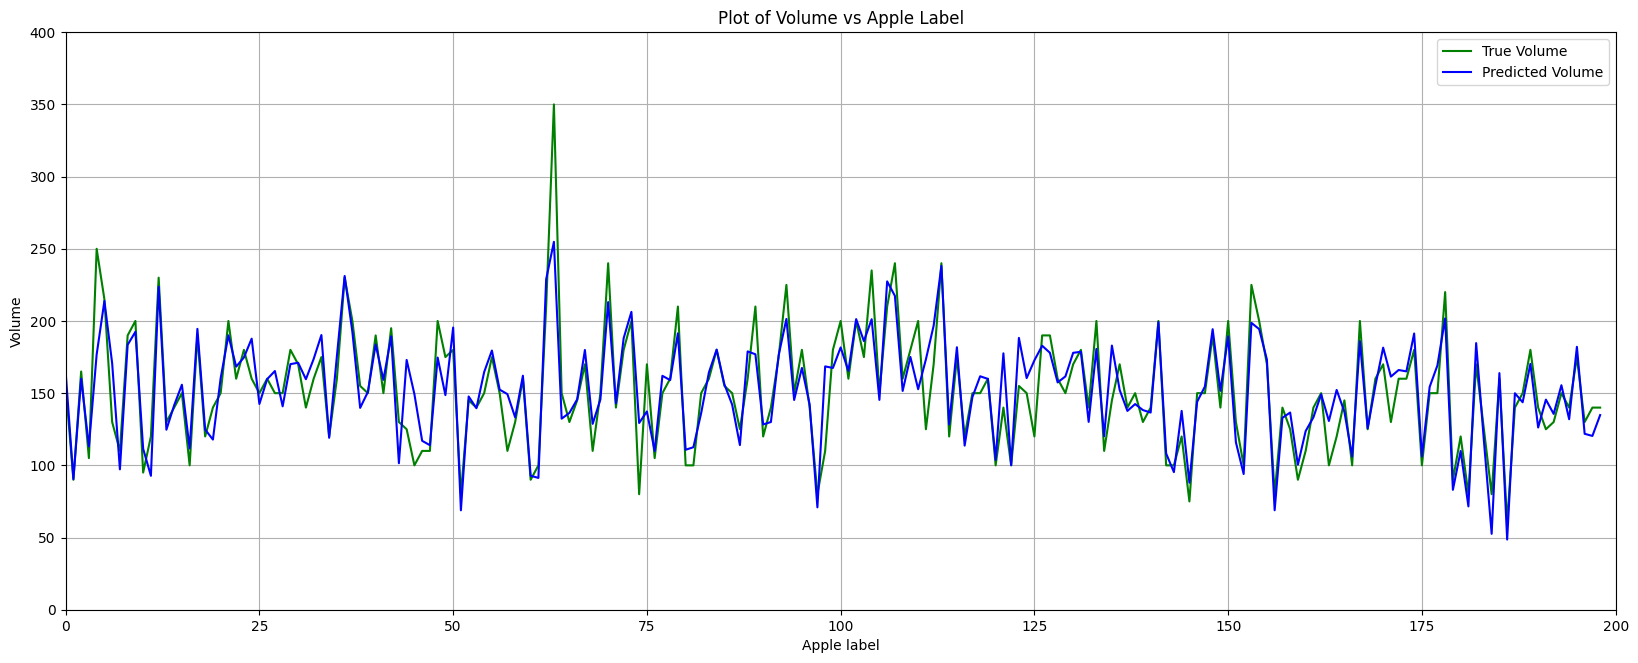

In [111]:
plot_true_volume_vs_predicted_volume(y_true, y_pred)

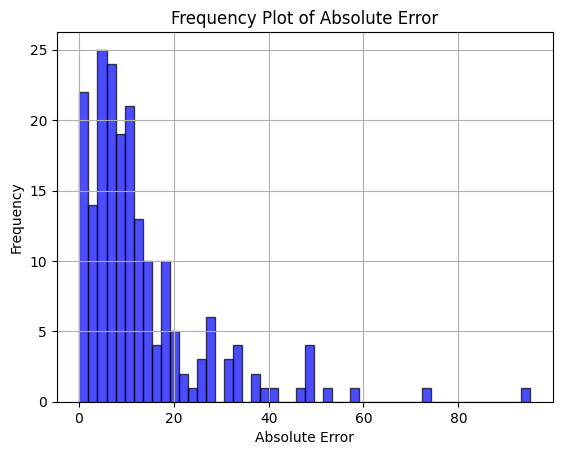

In [112]:
absolute_errors = get_absolute_error(y_pred, y_true)
plot_absolute_error_freq(absolute_errors)